# SVM Classifier

Importing libraries in the jupyter notebook to run the SVM classifier on the dataset.

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import scipy.io

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Loading the dataset in a python dictionary

In [ ]:
data = scipy.io.loadmat('dataset.mat')

Separating the dataset into the input data and the output data as X and Y respectively

In [ ]:
X = data['X']
Y = data['Y']

Randomly splitting the input and output data into training and testing datasets. *(I'm using 1:1 ratio here)*


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

## Linear Kernel Function

Running the SVM classifier for a linear kernel function with different values of C.

In [ ]:
C_list = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
linear_accuracies = []

In [ ]:
for c in C_list:
  linear_clf = svm.SVC(C=c,kernel='linear')
  linear_clf.fit(X_train, y_train)
  linear_predictions = linear_clf.predict(X_test)
  linear_accuracy = accuracy_score(y_test, linear_predictions)
  linear_accuracies.append(linear_accuracy)
  print("C        :", c)
  print("Accuracy :", linear_accuracy)
  print("")

Plotting the C vs Accuracy graph for our Linear Kernel SVM Classifier:

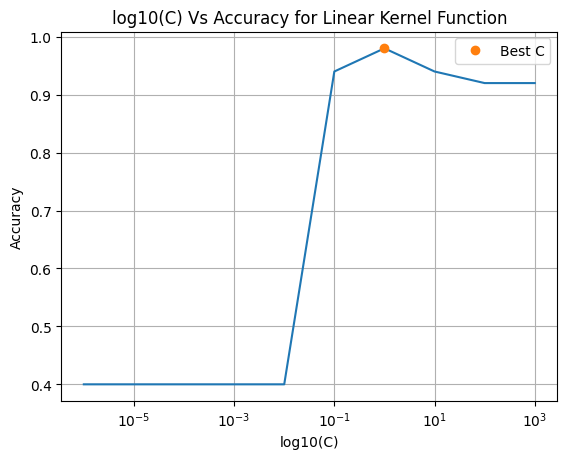

In [ ]:
plt.plot(C_list, linear_accuracies)
plt.plot(C_list[linear_accuracies.index(max(linear_accuracies))], max(linear_accuracies), 'o', label = "Best C")
plt.xscale("log")
plt.xlabel("log10(C)")
plt.ylabel("Accuracy")
plt.title("log10(C) Vs Accuracy for Linear Kernel Function")
plt.grid(True)
plt.legend()
plt.show()

## Polynomial Kernel Function

Running the SVM classifier for a polynomial kernel function with different values of degree and C.

In [ ]:
C_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
degree_list = [1, 2, 3, 4, 5]
poly_accuracies = []

In [ ]:
for c in C_list:
  accuracies=[]
  for degree in degree_list:
    poly_clf = svm.SVC(C = c, kernel='poly', degree = degree)
    poly_clf.fit(X_train, y_train)
    poly_predictions = poly_clf.predict(X_test)
    poly_accuracy = accuracy_score(y_test, poly_predictions)
    accuracies.append(poly_accuracy)
    print("C        :", c)
    print("Degree   :", degree)
    print("Accuracy :", poly_accuracy)
    print("")
  poly_accuracies.append(accuracies)

Plotting the Degree Vs Accuracy graphs for different values of C for our Polynomial Kernel Classifier:

0.0001 5 0.88
0.001 5 0.96
0.01 4 0.98
0.1 3 0.98
1 2 0.98
10 2 0.96
100 1 0.96
1000 5 0.94


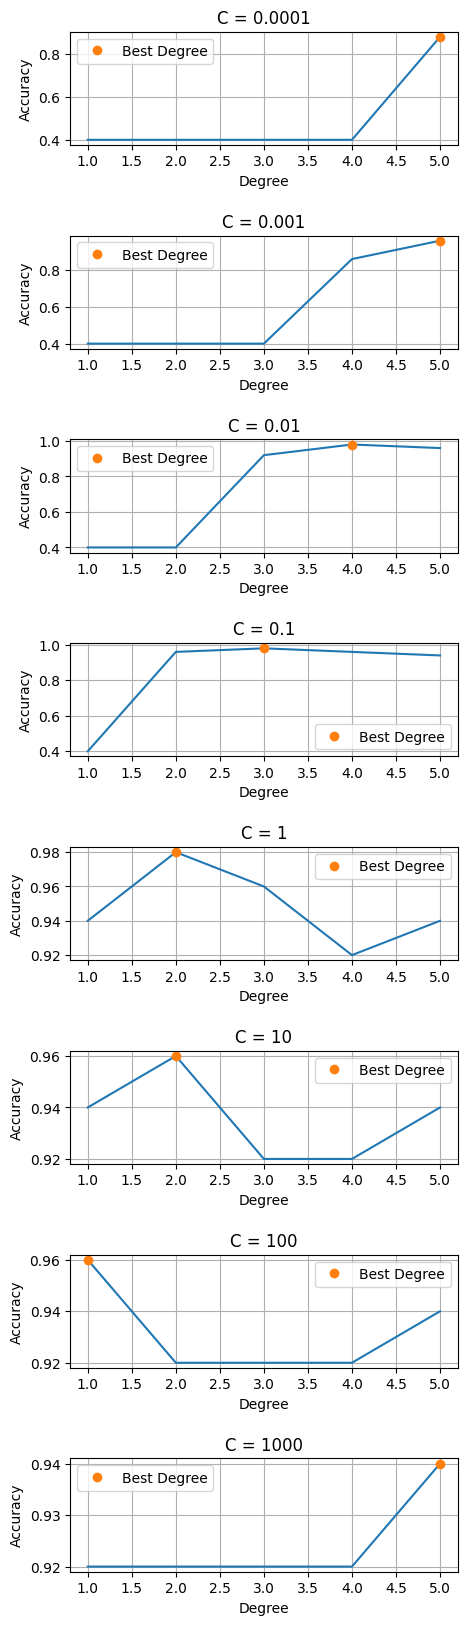

In [ ]:
figure, axis = plt.subplots(8, figsize=(5, 20))
plt.subplots_adjust(hspace=0.8)
for i in range(len(C_list)):
  highest_accuracy = max(poly_accuracies[i])
  best_degree = degree_list[poly_accuracies[i].index(highest_accuracy)]
  print(C_list[i], best_degree, highest_accuracy)
  axis[i].plot(degree_list, poly_accuracies[i])
  axis[i].plot(best_degree, highest_accuracy, 'o', label = "Best Degree")
  axis[i].set_title("C = " + str(C_list[i]))
  axis[i].set_xlabel("Degree")
  axis[i].set_ylabel("Accuracy")
  axis[i].grid()
  axis[i].legend()
plt.show()


## RBF Kernel Function

Running the SVM classifier for a radial basis function kernel with different values of degree and C.

In [ ]:
C_list = [0.1, 1, 10, 100, 1000]
sigma_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
rbf_accuracies = []

In [ ]:
for c in C_list:
  accuracies=[]
  for sigma in sigma_list:
    rbf_clf = svm.SVC(C = c, kernel='rbf', gamma=sigma)
    rbf_clf.fit(X_train, y_train)
    rbf_predictions = rbf_clf.predict(X_test)
    rbf_accuracy = accuracy_score(y_test, rbf_predictions)
    accuracies.append(rbf_accuracy)
    print("C        :", c)
    print("Sigma    :", sigma)
    print("Accuracy :", rbf_accuracy)
    print("")
  rbf_accuracies.append(accuracies)

Plotting the Sigma Vs Accuracy graphs for different values of C for our RBF Kernel Classifier:

0.1 0.5 0.9
1 0.6 0.98
10 0.1 0.98
100 1.4 0.94
1000 1.4 0.94


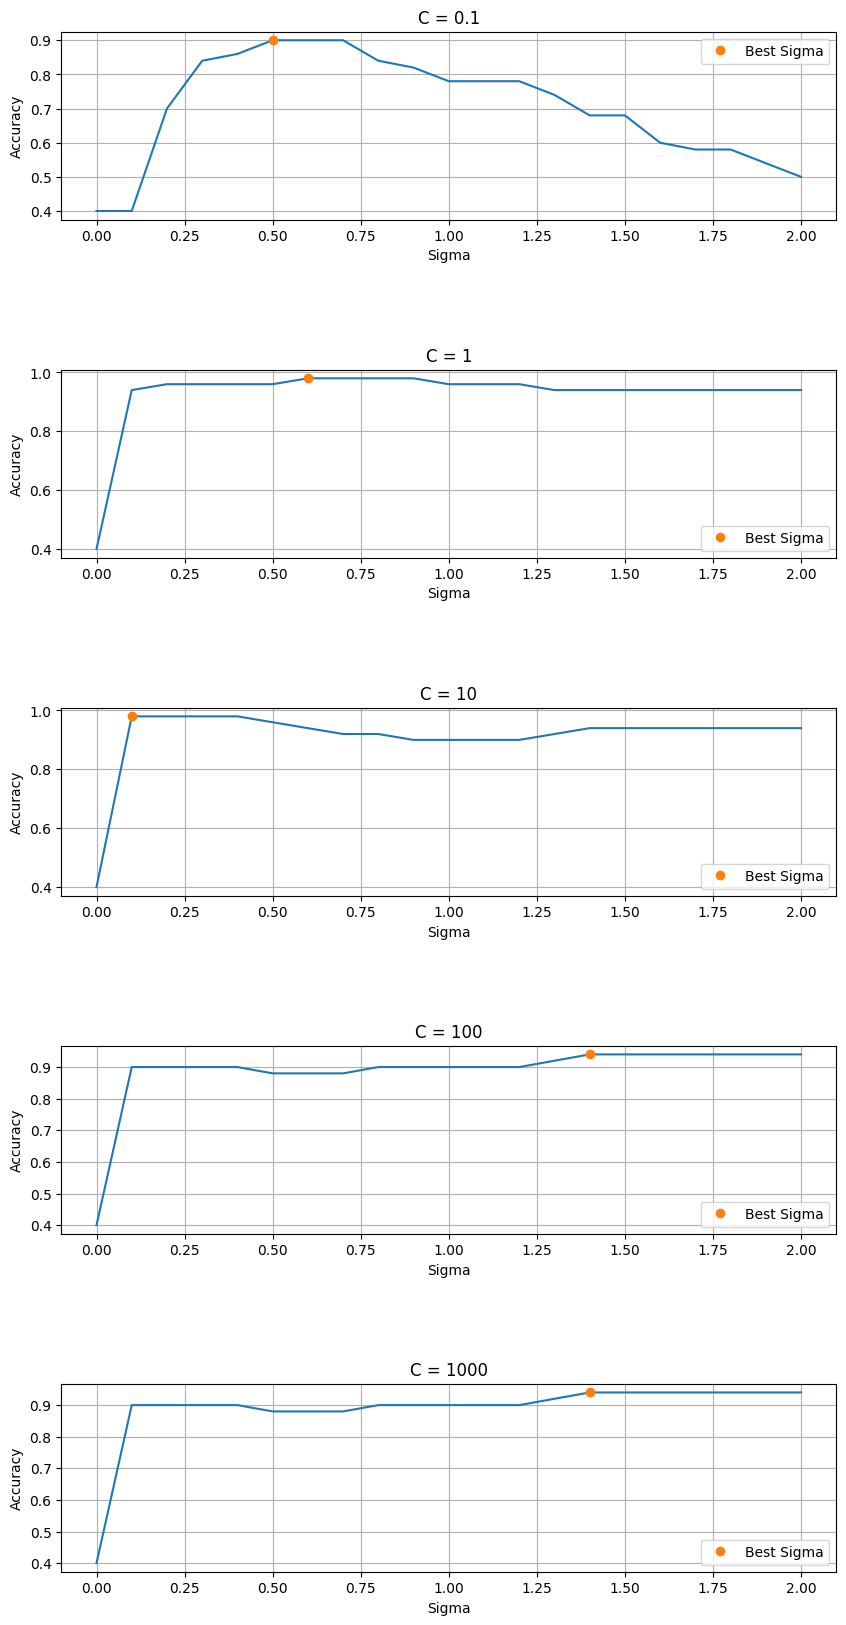

In [ ]:
figure, axis = plt.subplots(5, figsize=(10, 20))
plt.subplots_adjust(hspace=0.8)
for i in range(len(C_list)):
  highest_accuracy = max(rbf_accuracies[i])
  best_sigma = sigma_list[rbf_accuracies[i].index(highest_accuracy)]
  print(C_list[i], best_sigma, highest_accuracy)
  axis[i].plot(sigma_list, rbf_accuracies[i])
  axis[i].plot(best_sigma, highest_accuracy, 'o', label = "Best Sigma")
  axis[i].set_title("C = " + str(C_list[i]))
  axis[i].set_xlabel("Sigma")
  axis[i].set_ylabel("Accuracy")
  axis[i].grid()
  axis[i].legend()
plt.show()


## Running Cross Validation on RBF to find the best parameters

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]}

svm_model = SVC(kernel='rbf')
grid_search = GridSearchCV(svm_model, param_grid, cv=2)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

Best Parameters:  {'C': 1, 'gamma': 0.3}


In [ ]:
best_svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svm_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, gamma=0.3)

In [ ]:
predictions = best_svm_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

In [ ]:
print(accuracy)

0.96


## Running Cross Validation on Polynomial Kernel to find the best parameters

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'degree': [1, 2, 3, 4, 5]}

svm_model = SVC(kernel='poly')
grid_search = GridSearchCV(svm_model, param_grid, cv=2)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

Best Parameters:  {'C': 0.01, 'degree': 4}


In [ ]:
best_svm_model = SVC(kernel='poly', C=best_params['C'], degree=best_params['degree'])
best_svm_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.01, degree=4, kernel='poly')

In [ ]:
predictions = best_svm_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.98


## Running Cross Validation on Linear Kernel to find the best parameters

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

svm_model = SVC(kernel='linear')
grid_search = GridSearchCV(svm_model, param_grid, cv=2)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

Best Parameters:  {'C': 1}


In [ ]:
best_svm_model = SVC(kernel='linear', C=best_params['C'])
best_svm_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear')

In [ ]:
predictions = best_svm_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.98
